area enclosed by data points=28.972


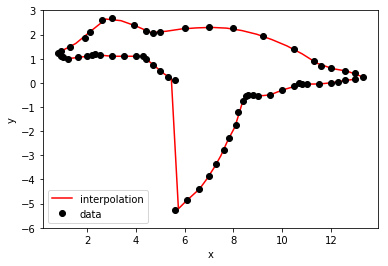

In [20]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.interpolate
from scipy.integrate import simps

x = [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3,13.0,12.6,12.3,12.0,11.5,11.0,10.8,10.7,10.5,10.0,9.5,9.0,8.8,8.6,8.5,8.4,8.2,8.1,7.8,7.6,7.3,7.0,6.6,6.1,5.6,5.6,5.3,5.0,4.7,4.4,4.3,4.0,3.5,3.0,2.5,2.3,2.2,2.0,1.6,1.2,1.0,0.9,0.8]
y = [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25,0.15,0.1,0.05,0.0,-0.05,-0.05,-0.05,0.0,-0.15,-0.3,-0.5,-0.55,-0.5,-0.5,-0.55,-0.75,-1.2,-1.75,-2.3,-2.8,-3.35,-3.85,-4.4,-4.85,-5.25,0.1,0.25,0.5,0.75,1.0,1.1,1.1,1.1,1.1,1.15,1.2,1.15,1.1,1.05,1.0,1.05,1.1,1.25]

#extracting upper part of data for area calculation
x0 = []
pos = 0
x0.append(x[0])

for i in range(1,len(x)):
    if(x[i]>x[i-1]):
        x0.append(x[i])
    else:
        pos = i
        break
        
y0 = y[0:pos]

xval = np.linspace(min(x0),max(x0),len(x0))
yval = scipy.interpolate.interp1d(x0,y0,kind='linear')

area1 = simps(yval(xval), xval) 

#extracting lower part of data for area calculation
x02 = x[pos:len(x)]
x2 = x02[::-1]
y02 = y[pos:len(y)]
y2 = y02[::-1]
val = 0
for i in range(1,len(x2)):
    if(x2[i-1]==x2[i]):
        x2[i] += 0.1

xval2 = np.linspace(min(x2),max(x2),len(x2))
yval2 = scipy.interpolate.interp1d(x2,y2,kind='linear')

area2 = simps(yval2(xval2), xval2)

#total area
if(area1>area2):
    tot_area = area1-area2
else:
    tot_area = area1-area2
    
print("area enclosed by data points=%.3f" %tot_area )

plt.figure()
plt.plot(xval, yval(xval), color='r',label='interpolation')
plt.plot(xval2, yval2(xval2), color='r')
plt.plot(x,y,'ko',label='data')
plt.ylim(-6,3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()